# Compile results

In [6]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [14]:
output_path = "../baselines/bm3d/results/output.mat"
filtered_data = scipy.io.loadmat(output_path)
filtered_I = filtered_data['cout']

In [16]:
input_path = "/home/nus/Downloads/decorr_complex_tsx_SLC_0.mat"
raw_data = scipy.io.loadmat(input_path)
raw_I = raw_data['cout']
raw_I = np.log1p(np.abs(raw_I) + 1)

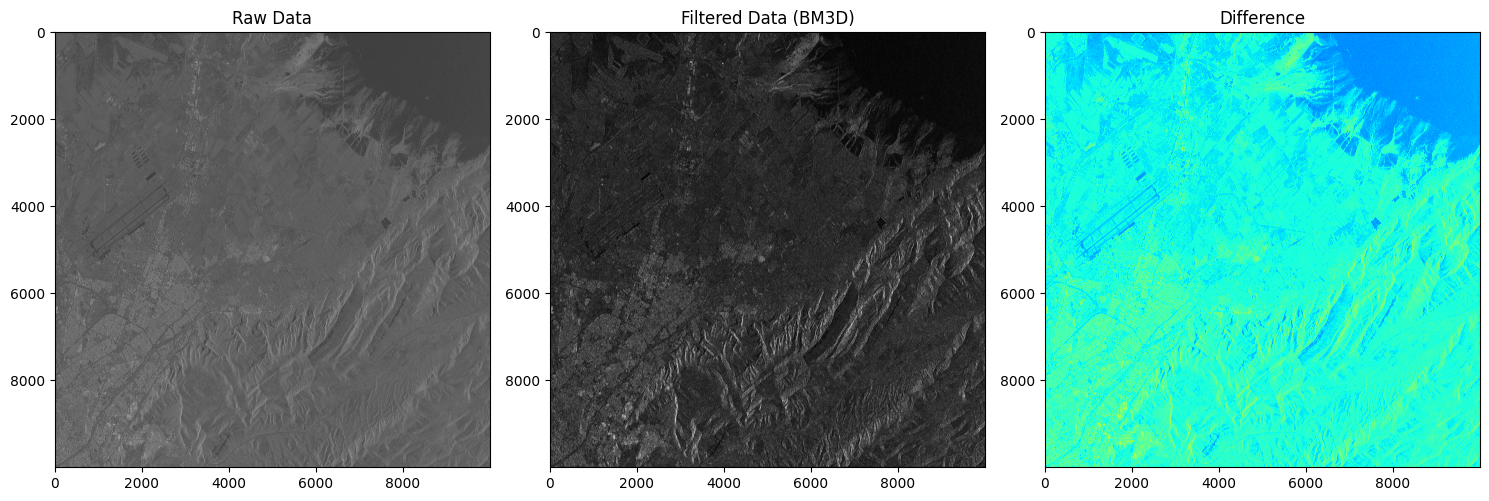

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(raw_I, cmap='gray')
plt.title('Raw Data')
plt.subplot(1, 3, 2)
plt.imshow(filtered_I, cmap='gray')
plt.title('Filtered Data (BM3D)')
plt.subplot(1, 3, 3)
plt.imshow(np.abs(raw_I - filtered_I), cmap='jet')
plt.title('Difference')
plt.tight_layout()